<a href="https://colab.research.google.com/github/sultanardian/Deep-Learning-and-Data-Science/blob/main/Iris%20KMeans%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dependencies
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Loading dataset
iris_df = datasets.load_iris()

# Check available methods
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [ ]:
# Feature
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Target
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# Create dataframe
df = pd.DataFrame(iris_df.data, columns = iris_df.feature_names)

In [ ]:
# Dataset slicing
x_axis = iris_df.data[:, 0] # Sepal length
y_axis = iris_df.data[:, 2] # Sepal width

In [ ]:
print(x_axis)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


In [ ]:
print(y_axis)

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


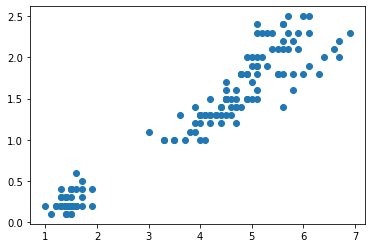

In [ ]:
# Check the scatterplot
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.show()

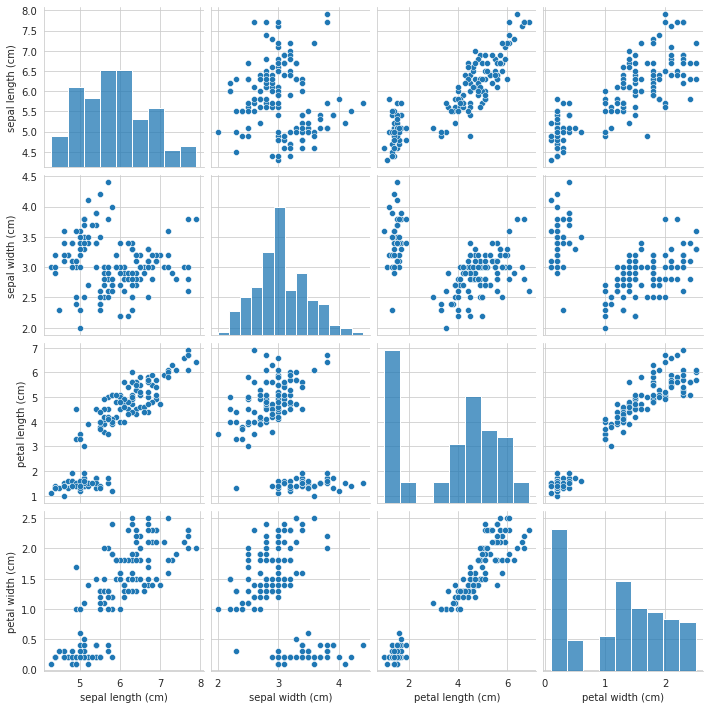

In [ ]:
# Check all features scatterplot
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

In [ ]:
# Import KMeans clustering algorithm
from sklearn.cluster import KMeans

In [ ]:
# Create function to show an inertias
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        model = KMeans(n_clusters = k)
        model.fit(data)
        means.append(k)
        inertias.append(model.inertia_)
    
    fig = plt.subplots(figsize = (10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('K Number')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show

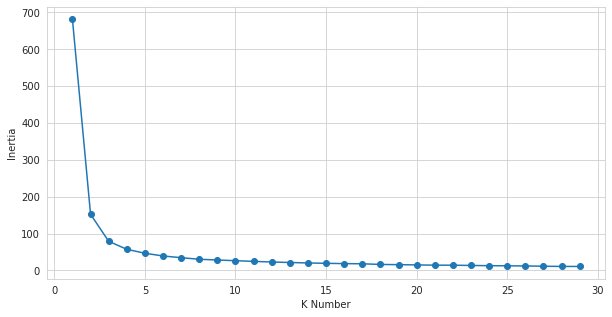

In [ ]:
# Call the function
optimize_k_means(df, 30)

In [ ]:
# Create model with optimum n_cluster
model = KMeans(n_clusters = 3)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Get the cluster labels
df['KMeans'] = model.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


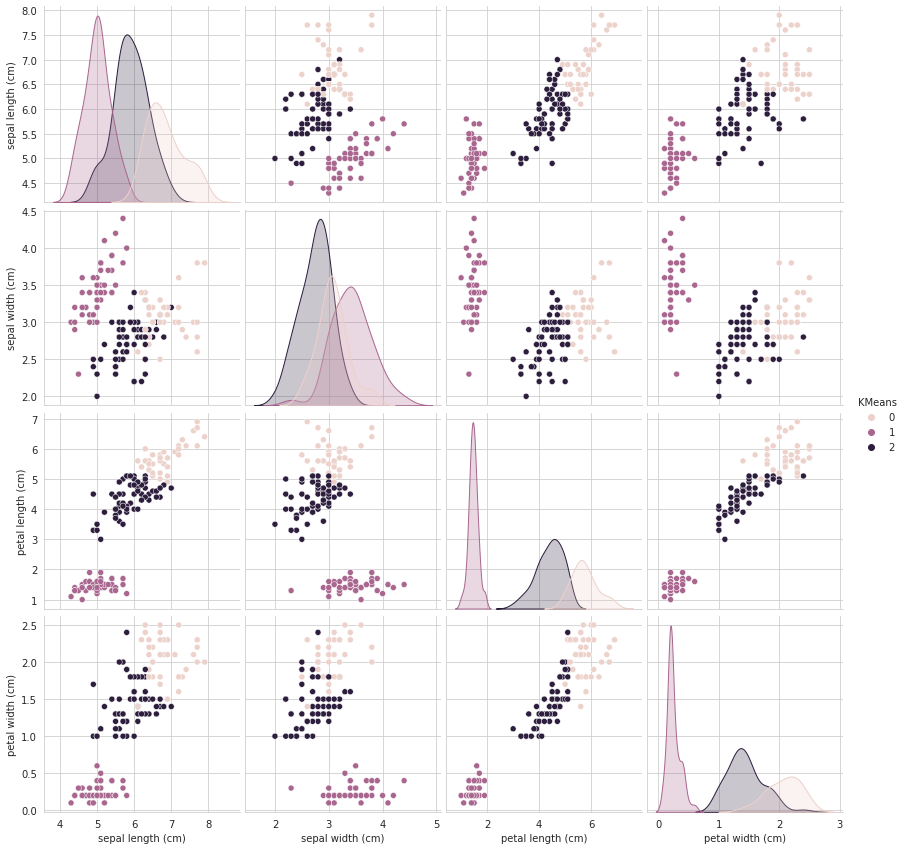

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'KMeans', height = 3)
plt.show()

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
centroid = pd.DataFrame(model.cluster_centers_, columns = iris_df.feature_names)
centroid['KMeans'] = [0, 1, 2]
centroid['labels'] = ['centroid-0', 'centroid-1', 'centroid-2']
centroid

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans,labels
0,6.850000,3.073684,5.742105,2.071053,0,centroid-0
1,5.006000,3.428000,1.462000,0.246000,1,centroid-1
2,5.901613,2.748387,4.393548,1.433871,2,centroid-2


In [ ]:
df_all = pd.merge(df, centroid, on = 'KMeans')
df_all

,sepal length (cm)_x,sepal width (cm)_x,petal length (cm)_x,petal width (cm)_x,KMeans,sepal length (cm)_y,sepal width (cm)_y,petal length (cm)_y,petal width (cm)_y,labels
0,5.1,3.5,1.4,0.2,1,5.006,3.428000,1.462000,0.246000,centroid-1
1,4.9,3.0,1.4,0.2,1,5.006,3.428000,1.462000,0.246000,centroid-1
2,4.7,3.2,1.3,0.2,1,5.006,3.428000,1.462000,0.246000,centroid-1
3,4.6,3.1,1.5,0.2,1,5.006,3.428000,1.462000,0.246000,centroid-1
4,5.0,3.6,1.4,0.2,1,5.006,3.428000,1.462000,0.246000,centroid-1
...,...,...,...,...,...,...,...,...,...,...
145,6.8,3.2,5.9,2.3,0,6.850,3.073684,5.742105,2.071053,centroid-0
146,6.7,3.3,5.7,2.5,0,6.850,3.073684,5.742105,2.071053,centroid-0
147,6.7,3.0,5.2,2.3,0,6.850,3.073684,5.742105,2.071053,centroid-0
148,6.5,3.0,5.2,2.0,0,6.850,3.073684,5.742105,2.071053,centroid-0
